### This notebook processes this project's hypothesis 1: 
#### Electronic waste generation per capita and % of material recovery have a strong relationship with education. We will use both education attainment and education expenditure statistics to evaluate the relationship.

In [1]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import climate_change_util as cc #Importing util file with functions as module

##### Import the data processing notebook to use the merged dataframe directly

/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_76257/3739285020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clean_df.corr()
/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_76257/633062703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = clean_df.corr()


                                         Year  Composting%  Disposal%  \
Year                                 1.000000          NaN        NaN   
Composting%                               NaN     1.000000  -0.682426   
Disposal%                                 NaN    -0.682426   1.000000   
Landfill%                                 NaN    -0.717239   0.962077   
Material_recovery%                        NaN     0.795497  -0.839744   
Recovery%                                 NaN     0.678854  -0.999540   
Recycling%                                NaN          NaN  -0.756778   
Amt_for_recovery_operations               NaN          NaN        NaN   
Composting                                NaN          NaN        NaN   
Electronic_waste                          NaN          NaN        NaN   
Household_waste                           NaN          NaN        NaN   
Landfill                                  NaN          NaN        NaN   
Municipal_waste_generated                 NaN      

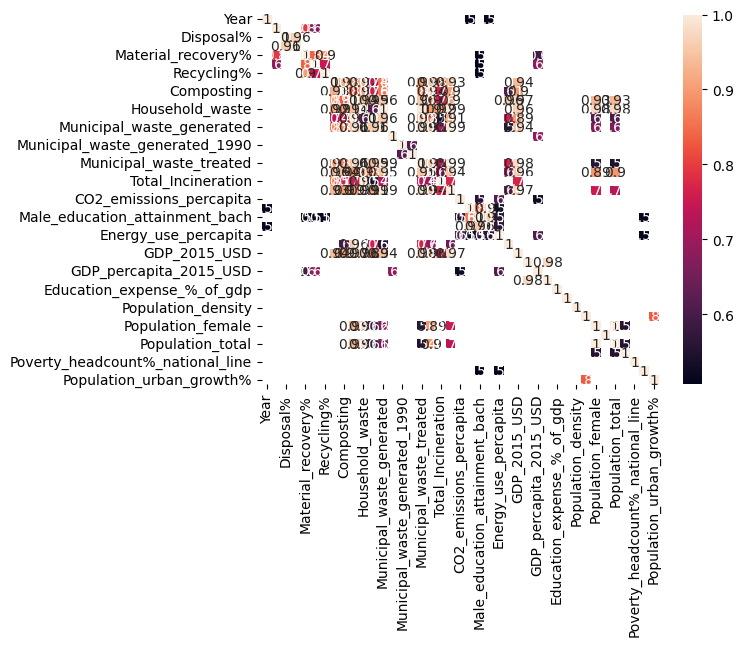

In [2]:
%run climate_change_data_processing.ipynb

In [3]:
clean_df.head()

,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,...,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.0,...,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.0,...,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.6,...,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365


In [4]:

# time trends for each or a few vars for each country
#corr plot
#pairwise plot
#correlation matrix
#corr test (pearson)
#check for each country as well to see if any country in particular has a correlation
#conclusion

In [5]:
clean_df.columns

Index(['Year', 'COU', 'Country', 'Composting%', 'Disposal%', 'Landfill%',
       'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_headcount%_ppp',
 

In [6]:
hyp1_df = pd.DataFrame(data=clean_df, columns=['Year','COU','Country','Country_y','Material_recovery%','Electronic_waste',\
                                               'Population_total','Female_education_attainment_bach','Male_education_attainment_bach',\
                                               'Total_education_attainment_bach','Education_expense_%_of_gdp',\
                                               'Education_expense_%_of_total_exp'])

In [7]:
hyp1_df.columns

Index(['Year', 'COU', 'Country', 'Country_y', 'Material_recovery%',
       'Electronic_waste', 'Population_total',
       'Female_education_attainment_bach', 'Male_education_attainment_bach',
       'Total_education_attainment_bach', 'Education_expense_%_of_gdp',
       'Education_expense_%_of_total_exp'],
      dtype='object')

In [8]:
hyp1_df['Electronic_waste_percapita'] = hyp1_df['Electronic_waste']/hyp1_df['Population_total']

In [9]:
hyp1_df.dtypes

Year                                  int64
COU                                  string
Country                              string
Country_y                            string
Material_recovery%                  float64
Electronic_waste                    float64
Population_total                      int64
Female_education_attainment_bach    float64
Male_education_attainment_bach      float64
Total_education_attainment_bach     float64
Education_expense_%_of_gdp          float64
Education_expense_%_of_total_exp    float64
Electronic_waste_percapita          float64
dtype: object

#### Histogram  and density plots of each vairable

In [10]:
plot_list = hyp1_df[['Material_recovery%','Electronic_waste','Population_total','Female_education_attainment_bach',\
                    'Male_education_attainment_bach','Total_education_attainment_bach',\
                    'Education_expense_%_of_gdp','Education_expense_%_of_total_exp','Electronic_waste_percapita']]

def hist_plots(df,var): 
    plt.hist(df[var], bins='auto', color='#0504aa')
    plt.title(var)
    plt.show()
   

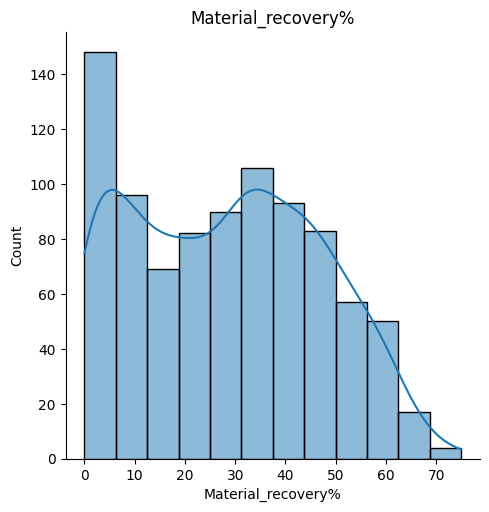

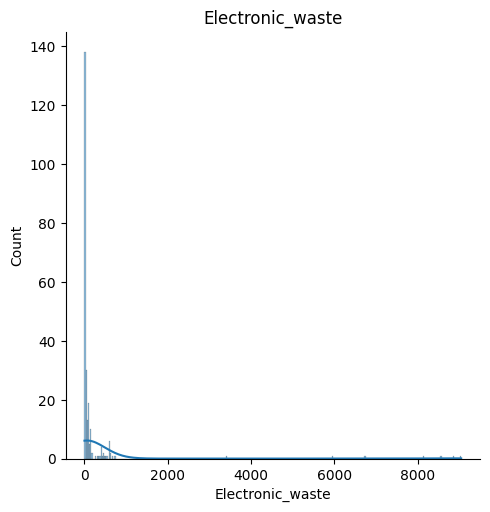

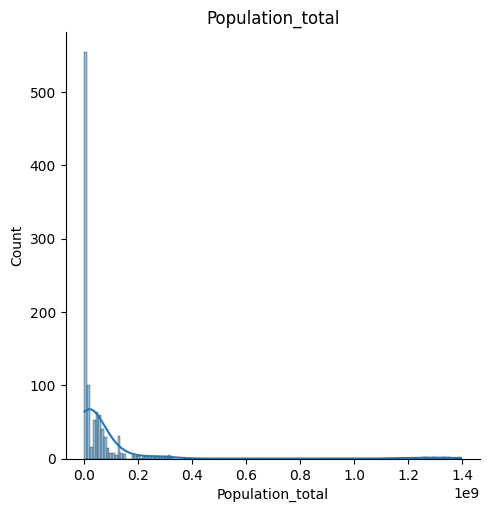

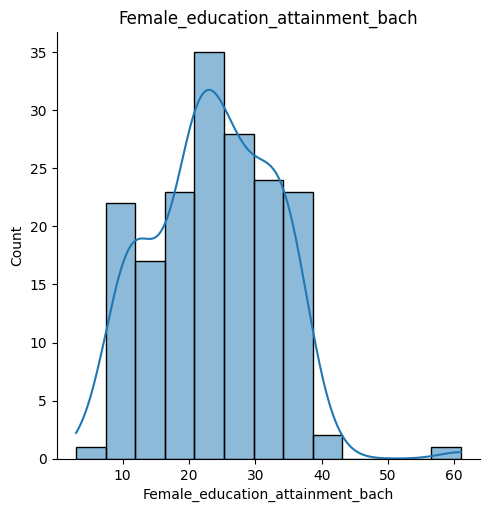

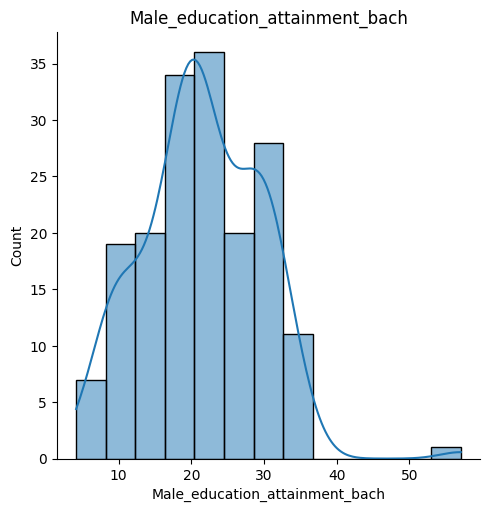

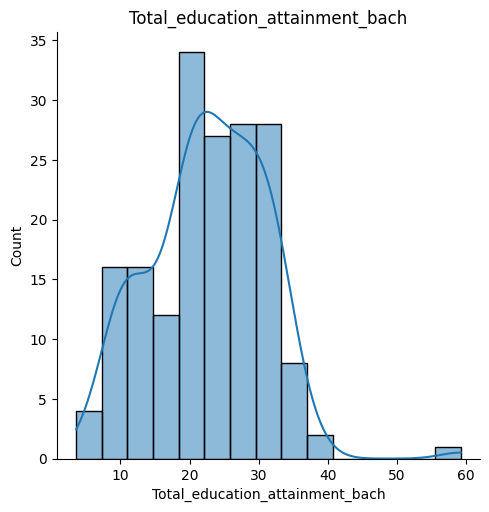

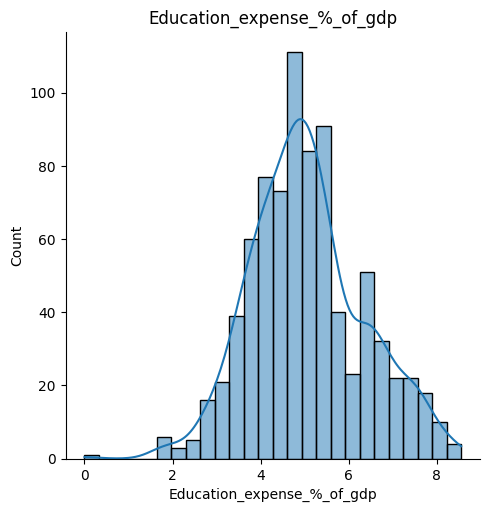

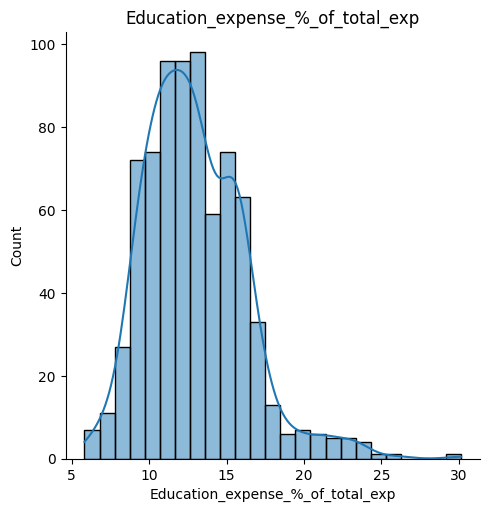

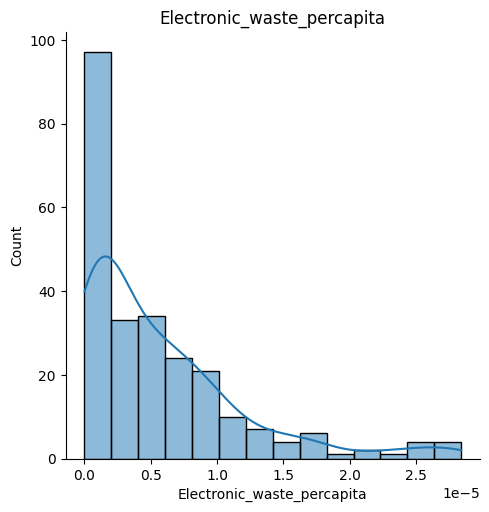

In [11]:
for var in plot_list:
    cc.density_plots(hyp1_df,var)

##### We can see that apart from "Education expense as a % of GDP", all other variables are non-normal. 

#### Overall trends of variables

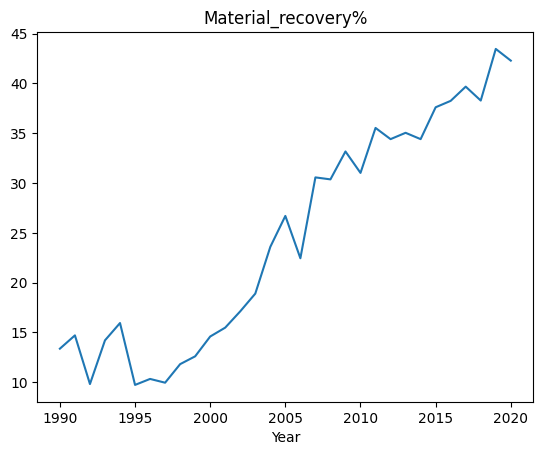

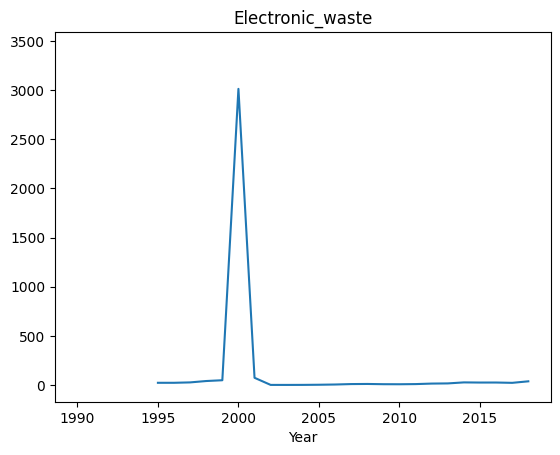

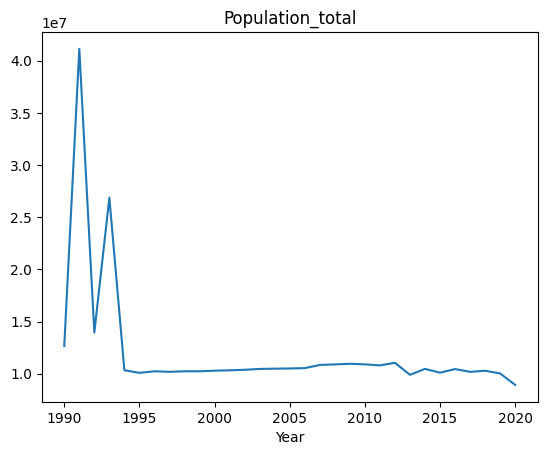

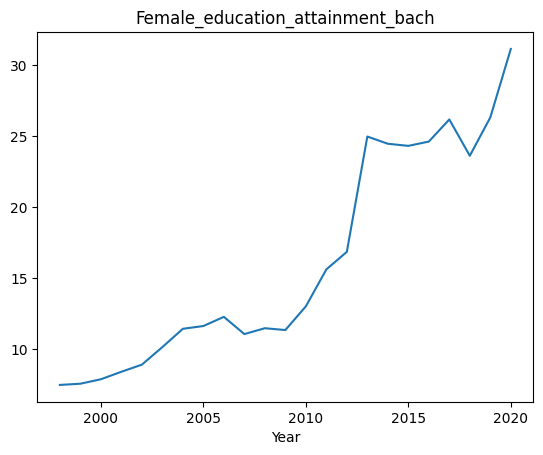

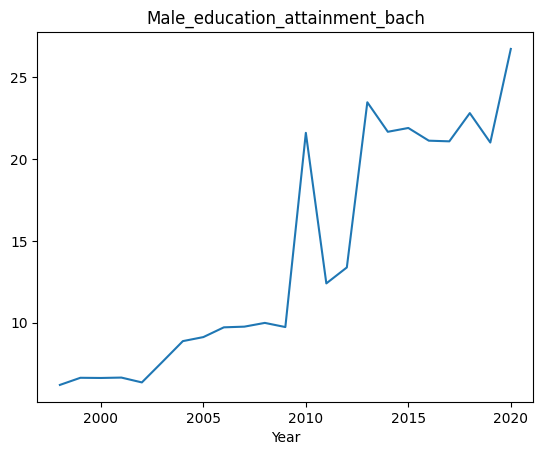

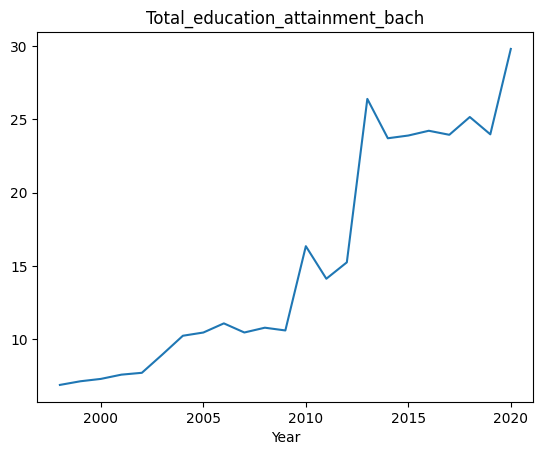

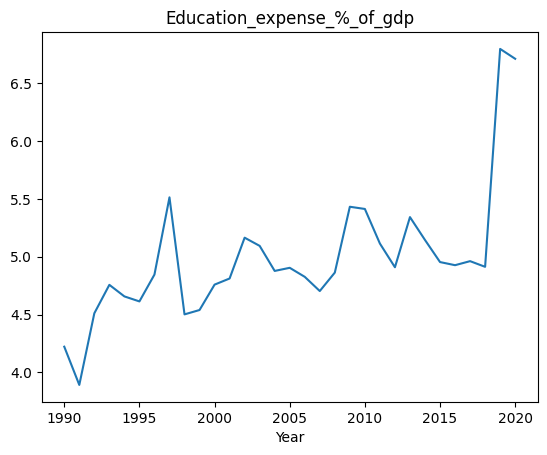

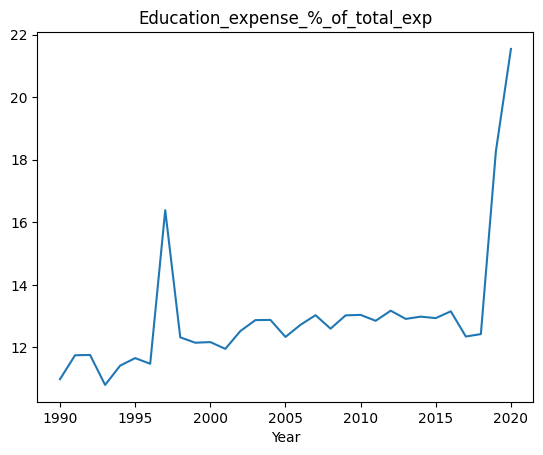

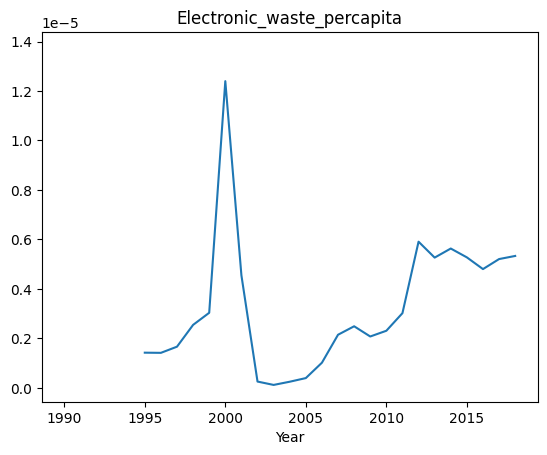

In [13]:
for var in plot_list:
    cc.median_trend_plots(hyp1_df,'Year',var)

###### Note (median trends over time, on an average for the developed world)

1. Material recovery has had a sharp upward trend. 

2. Electronic waste generation had a peak around 2000 but flattened quickly and remained so. 

3. Electronic waste per capita had a similar peak and fell down right after. It has had a somewhat upward trend in the recent year. 

4. Education attainment for all has also had sharp upward trends. 

5. Education expenditure has risen sharply in the recent years. 

#### Subplots for each indicator (WIP)

In [14]:
print(hyp1_df['Country'].nunique())

44


In [15]:
country_groups = hyp1_df.groupby("Country")

In [16]:
for (country_name, ax) in zip(country_groups.groups.keys(), axes.flatten()):
    # Plot each group in the plot and include it's title
    country_groups.get_group(country_name).plot(ax=ax, title=country_name)
# Display plot
plt.show()

NameError: name 'axes' is not defined

In [ ]:
fig, axs = plt.subplots(figsize=(20,30), nrows = 11, ncols = 4)
cnt = 0
fig.tight_layout(pad=2.0)
for key1 in hyp1_df["Country"].unique():
    ts2 = ts1[ts1["Country"]==key1]
    x1 = ts2["Year"]
    y1 = ts2["Recovery%"]
    
    i1 = cnt//4
    j1 = cnt%4
    
    axs[i1,j1].set_title(key1)
    axs[i1,j1].plot(x1, y1)    
    cnt+=1
    

plt.show()

#### Mean share of each country for each variable

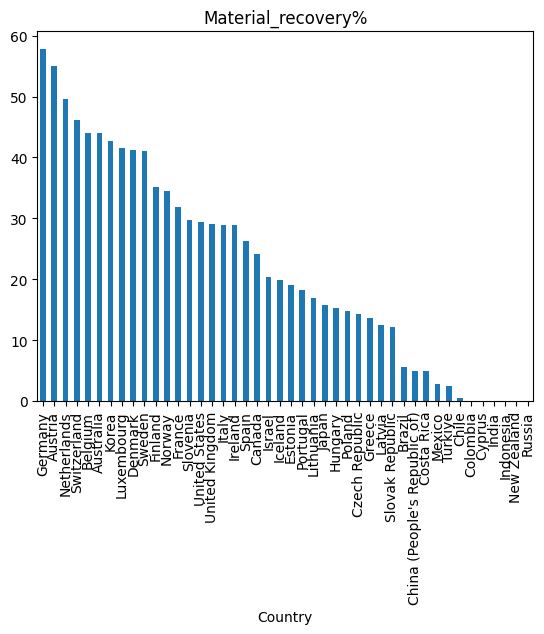

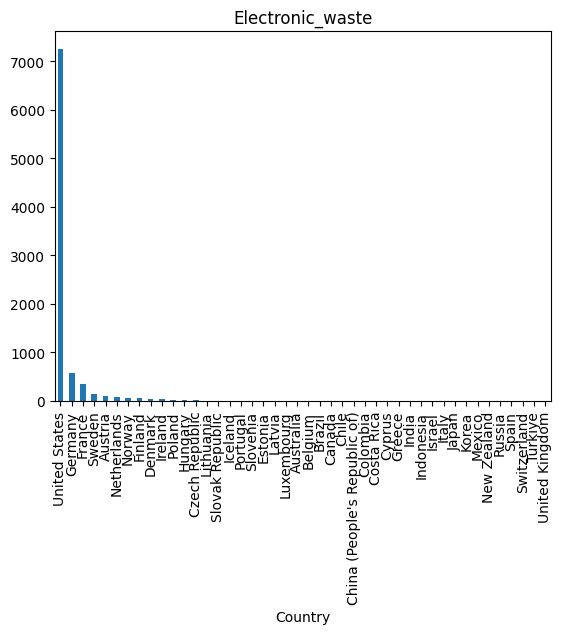

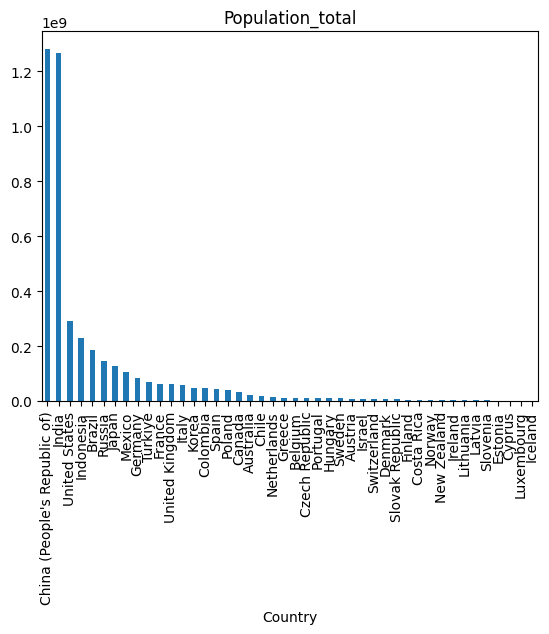

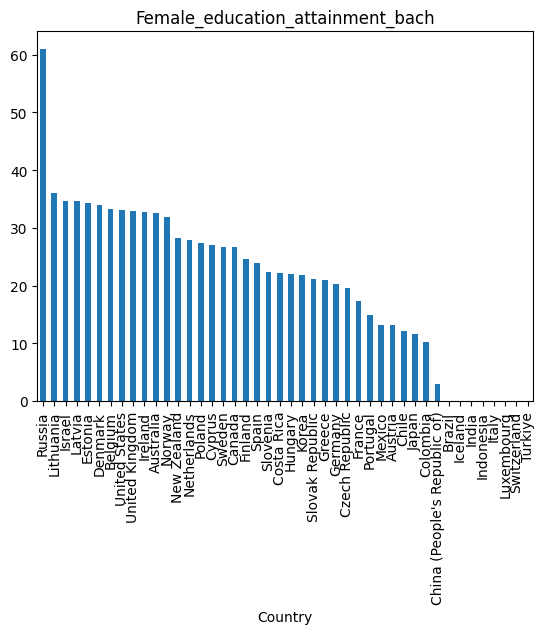

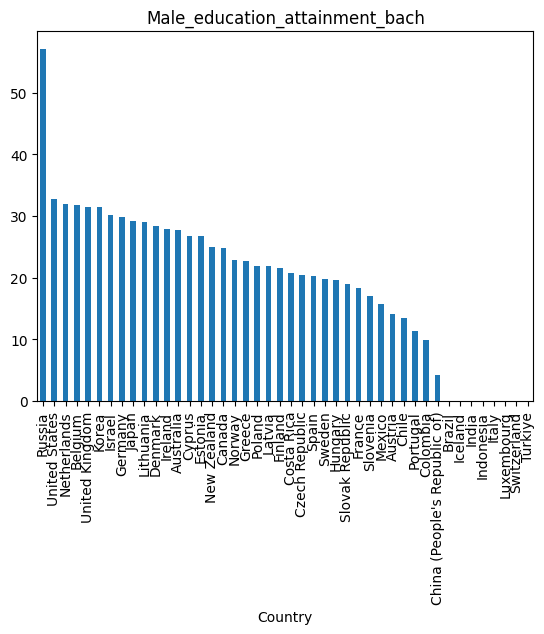

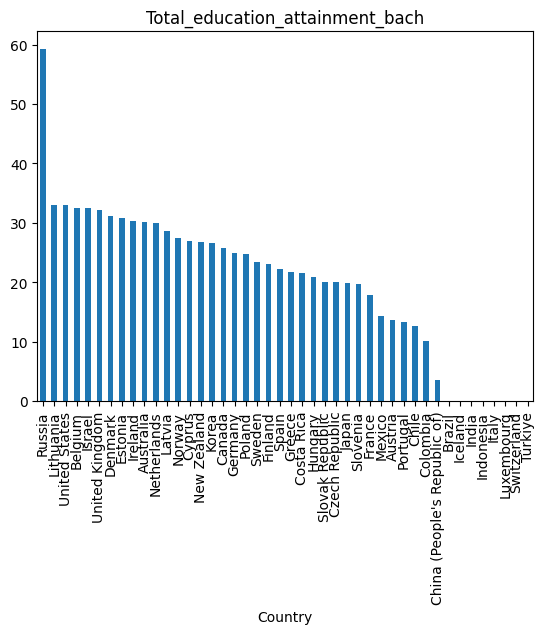

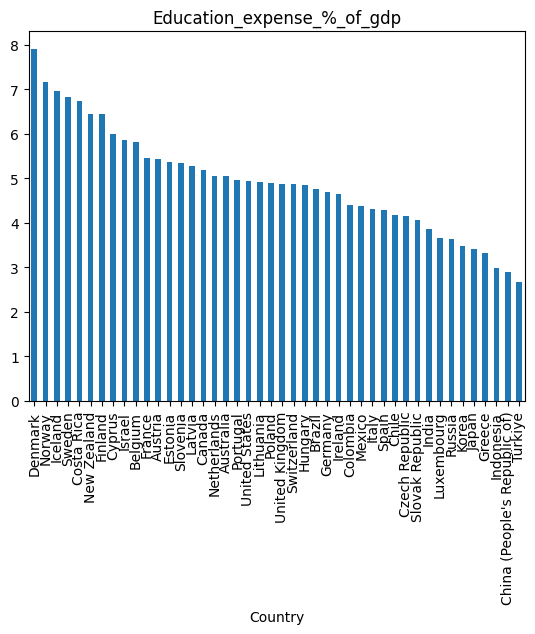

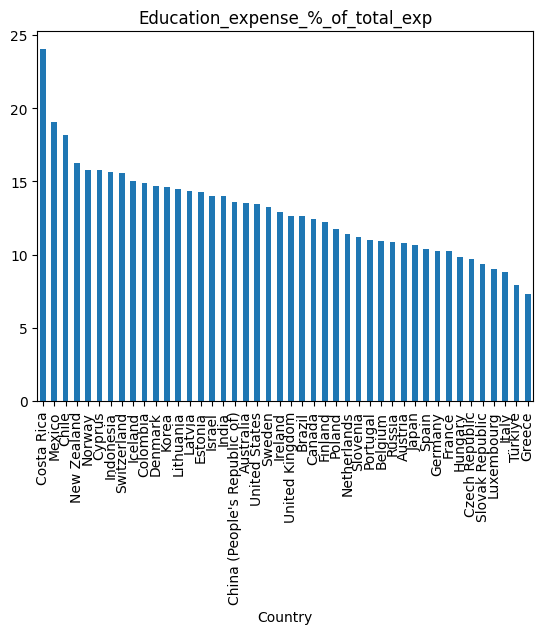

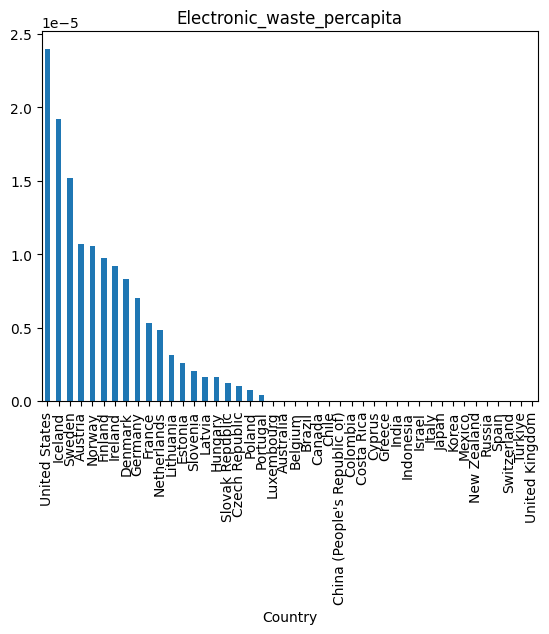

In [17]:
for var in plot_list:
    hyp1_df.groupby('Country')[var].mean().sort_values(ascending=False).plot(kind='bar', title=var)
    plt.xlabel('Country')
    plt.show()

###### Note (on average over time)
1. Russia is leading in terms of education attainment. 

2. Denmark spends the most % of GDP on education but Costa Rica spends the most % of total expenditure on education. 

3. Unites States generates the most electronic waste per capita and overall. 

4. Germany has the most material recovered over time.

#### Time trend for each variable

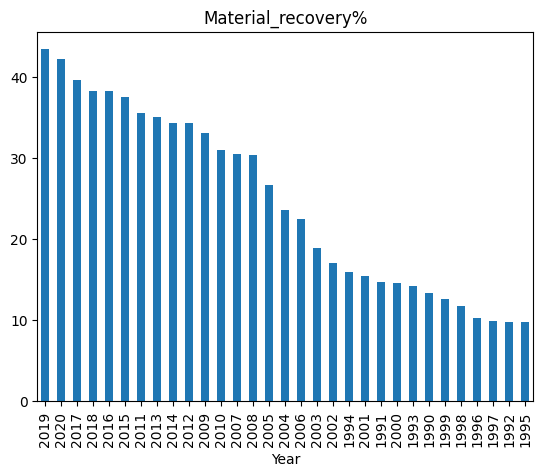

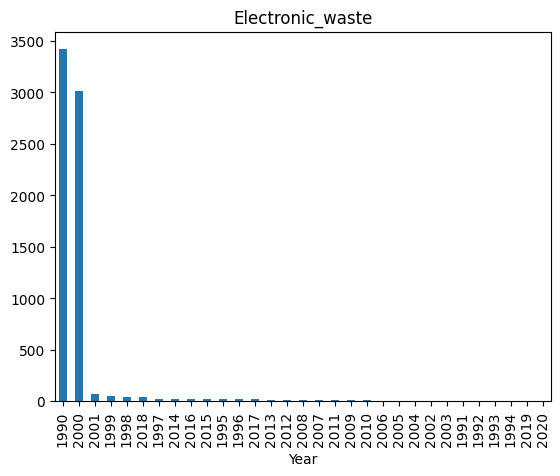

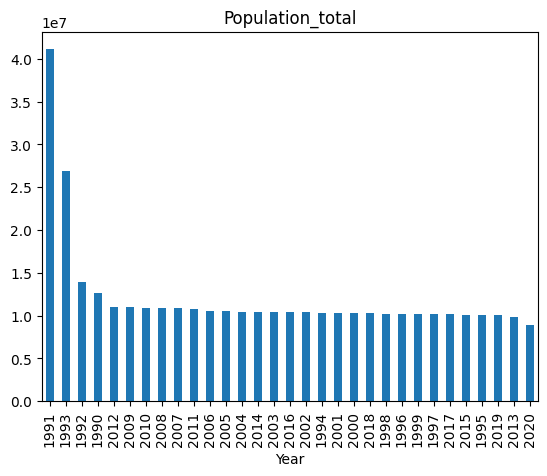

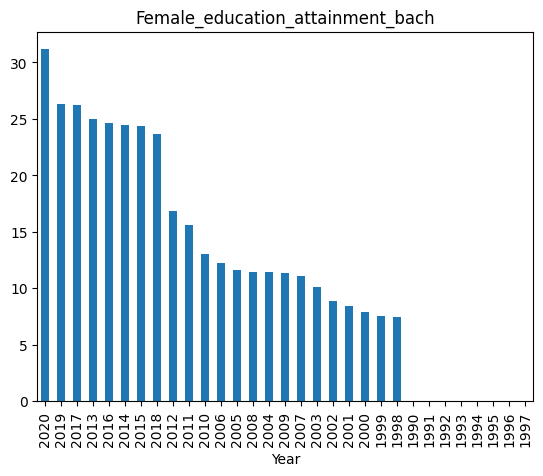

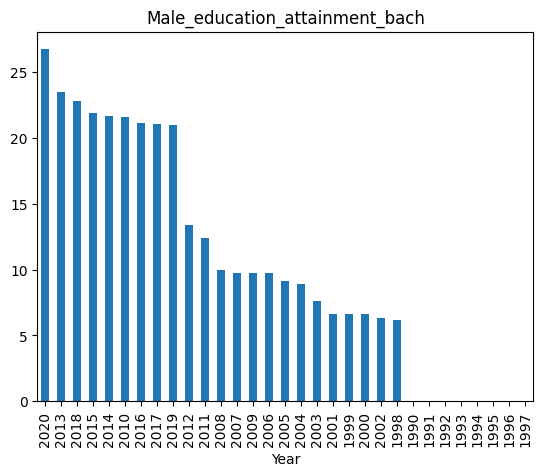

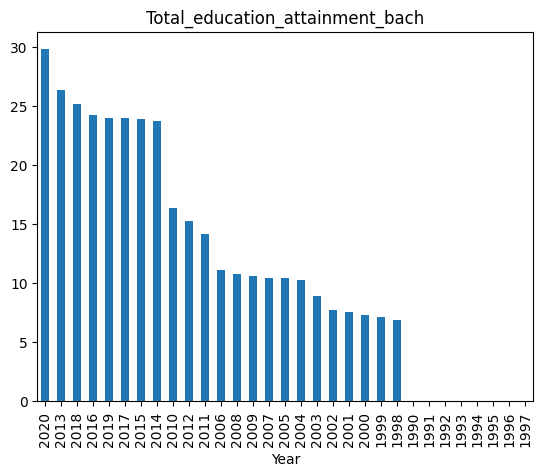

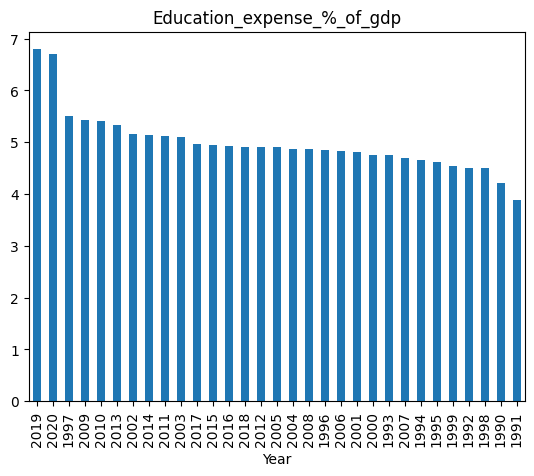

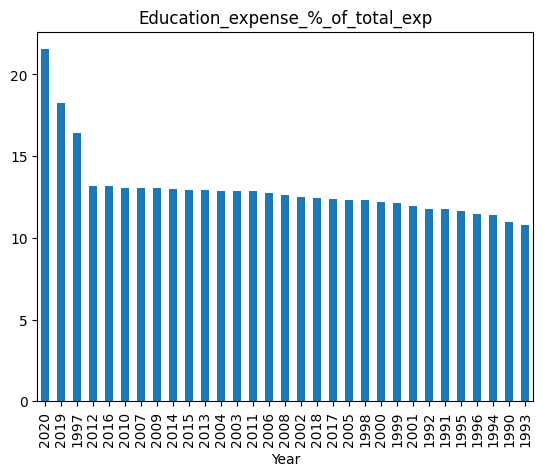

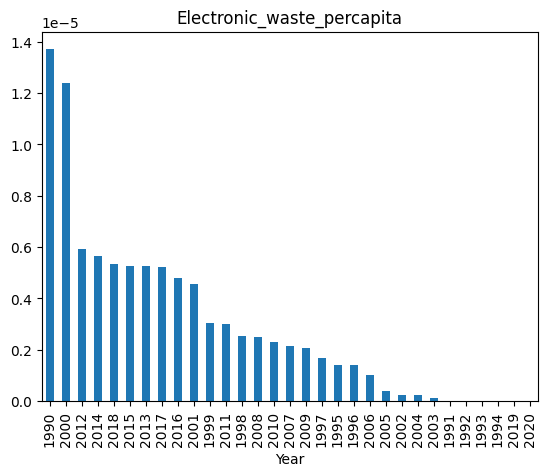

In [18]:
for var in plot_list:
    hyp1_df.groupby('Year')[var].median().sort_values(ascending=False).plot(kind='bar', title=var)
    plt.xlabel('Year')
    plt.show()

###### Note
1. Average material recovery peaked in 2019. 

2. Average electronic waste generation peaked in 1990 and 2000.

3. Average education attainment for all peaked in 2020. 

4. Average education expenditure (% of GDP) peaked in 2019. 

5. Average education expenditure (% of total expense) peaked in 2020. 

In [19]:
plot_list = hyp1_df[['Material_recovery%','Electronic_waste','Population_total','Female_education_attainment_bach',\
                    'Male_education_attainment_bach','Total_education_attainment_bach',\
                    'Education_expense_%_of_gdp','Education_expense_%_of_total_exp','Electronic_waste_percapita']]

In [20]:
Educ_attainment_list = hyp1_df[['Female_education_attainment_bach',\
                    'Male_education_attainment_bach','Total_education_attainment_bach']]

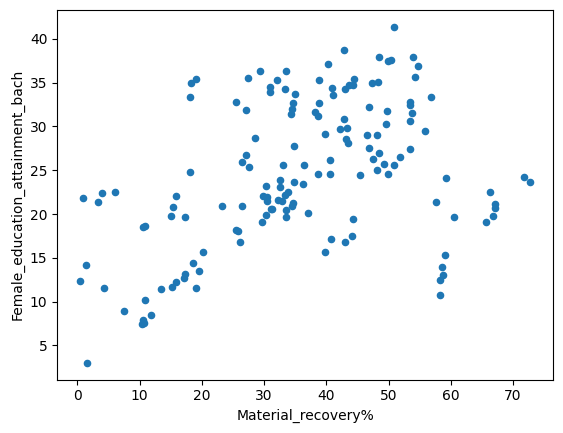

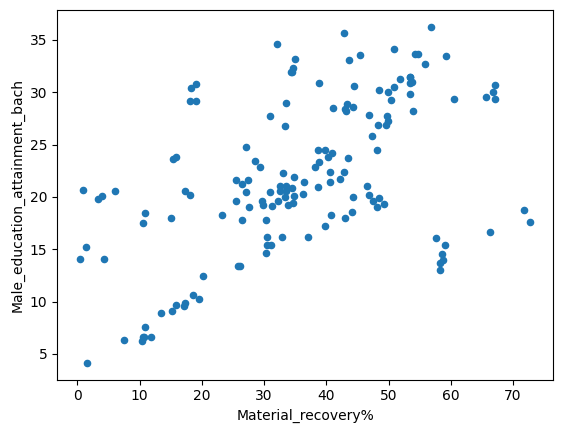

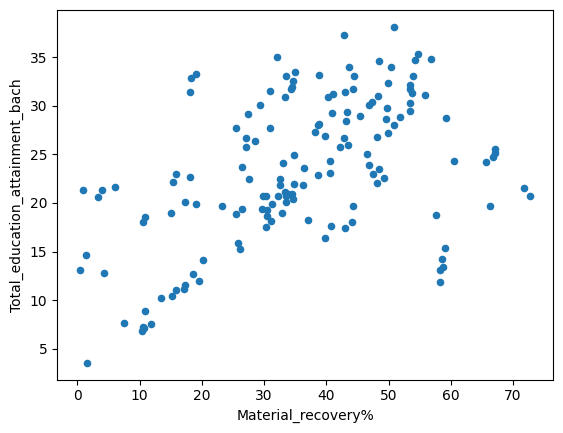

In [21]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Material_recovery%", y=var)

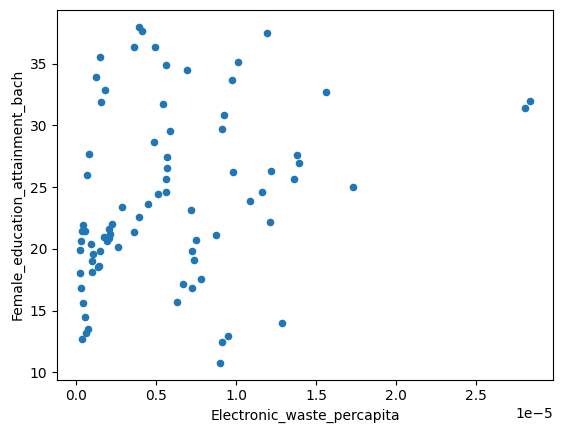

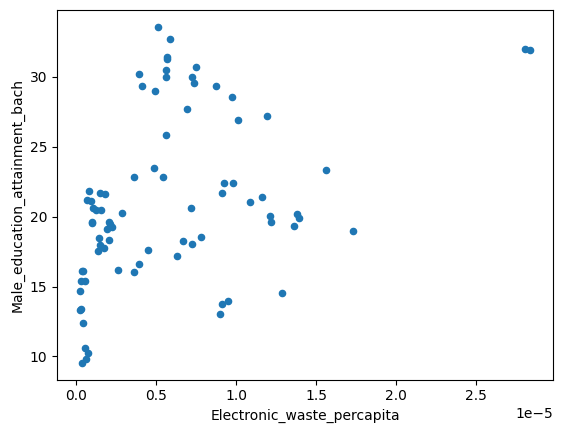

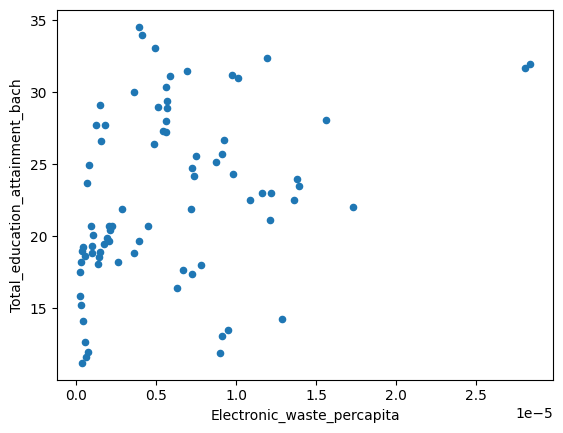

In [22]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Electronic_waste_percapita", y=var)

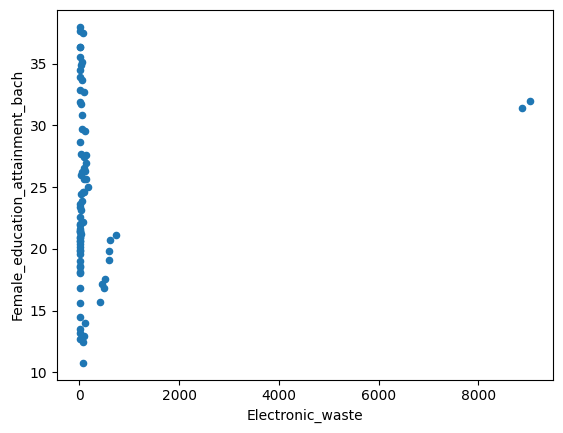

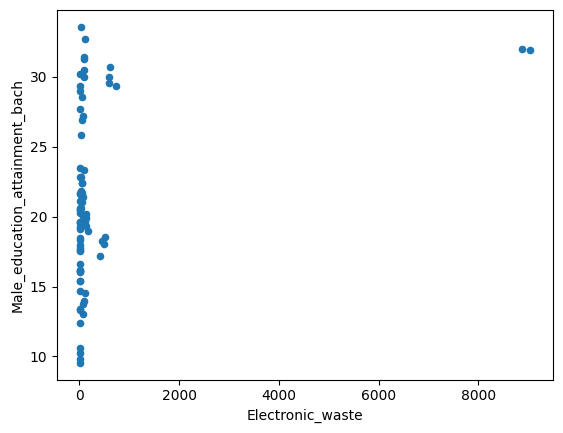

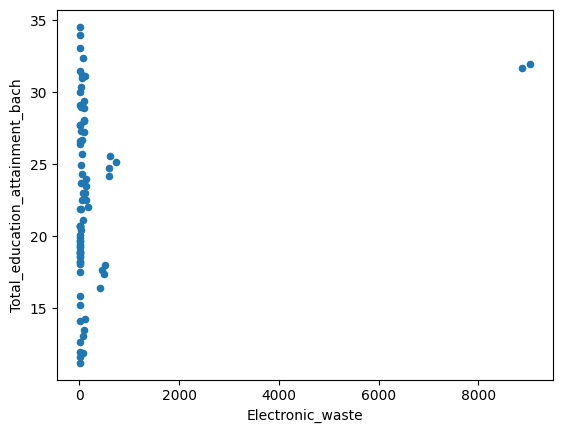

In [23]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Electronic_waste", y=var)

In [24]:
Educ_expense_list = hyp1_df[['Education_expense_%_of_gdp','Education_expense_%_of_total_exp']]

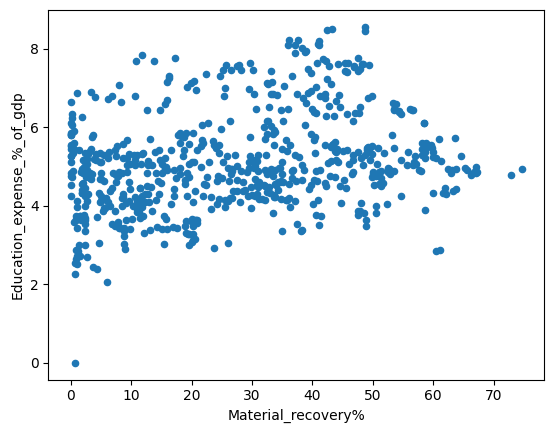

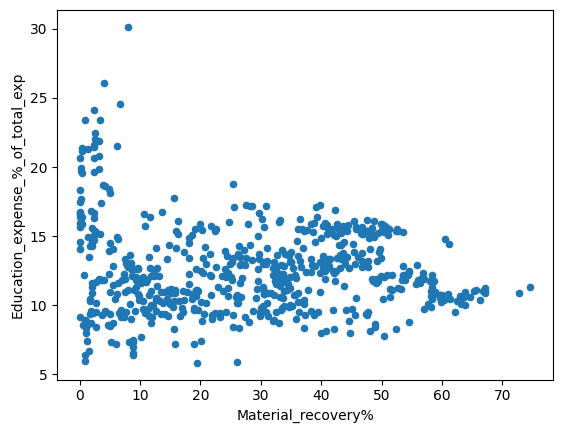

In [25]:
for var in Educ_expense_list:
    hyp1_df.plot.scatter(x="Material_recovery%", y=var)

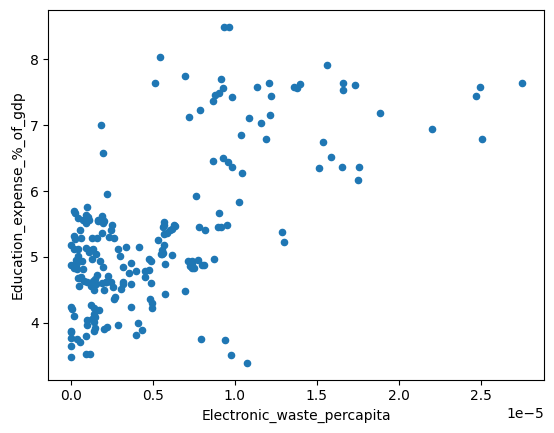

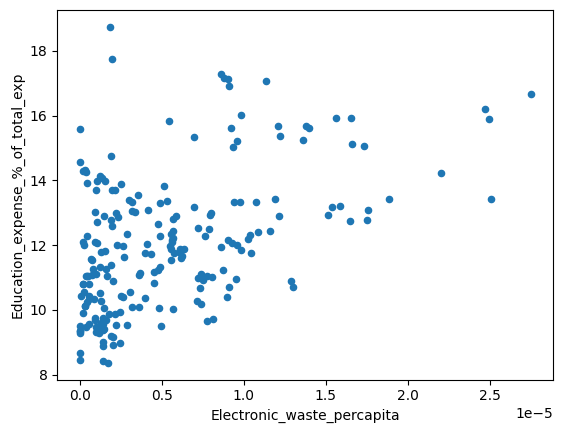

In [26]:
for var in Educ_expense_list:
    hyp1_df.plot.scatter(x="Electronic_waste_percapita", y=var)

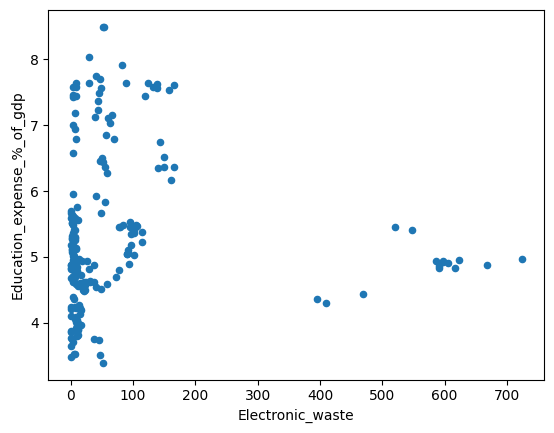

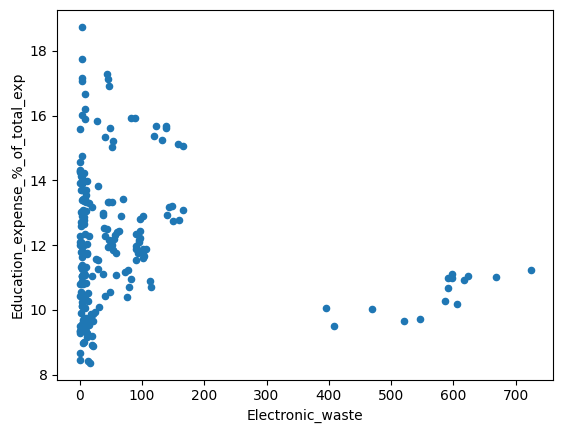

In [27]:
for var in Educ_expense_list:
    hyp1_df.plot.scatter(x="Electronic_waste", y=var)